In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine = pd.read_csv(url)

In [3]:
wine = pd.read_csv(url, sep=";")
wine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
wine['quality'].unique()


array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [9]:
wine.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

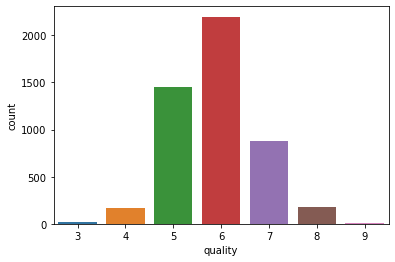

In [10]:
sns.countplot(x='quality', data=wine)

In [11]:
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    3655
good       1060
bad         183
Name: rating, dtype: int64

In [12]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,6.876060,0.277086,0.337877,6.797729,0.047740,35.962107,142.571272,0.994480,3.180720,0.487557,10.269808,5.601368
bad,7.180874,0.375984,0.307705,4.821038,0.050557,26.633880,130.232240,0.994343,3.183388,0.475956,10.173497,3.890710
good,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528


<AxesSubplot:>

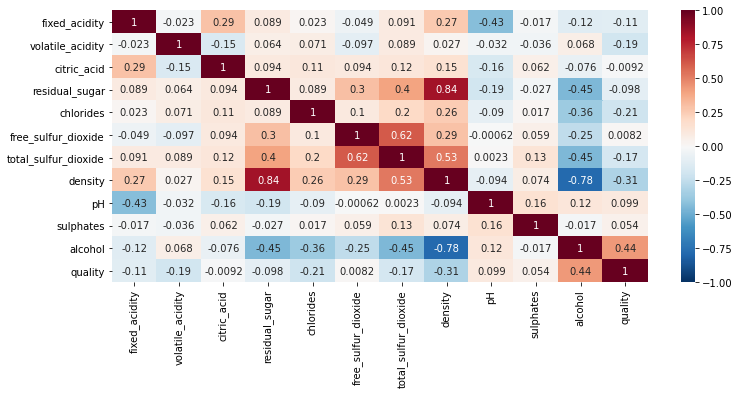

In [13]:
correlation = wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [14]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

[Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

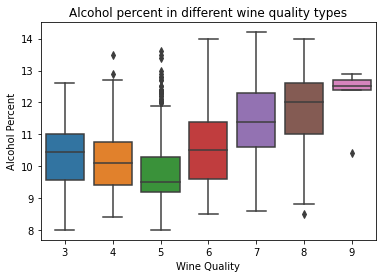

In [15]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')


[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

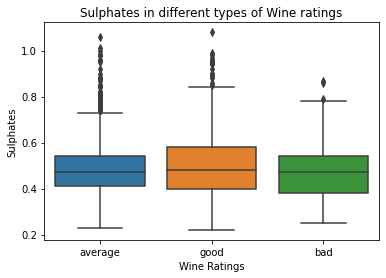

In [16]:

bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Xitric_acid in different types of Wine ratings')]

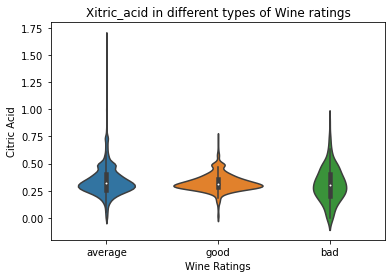

In [17]:
bx = sns.violinplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Xitric_acid in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

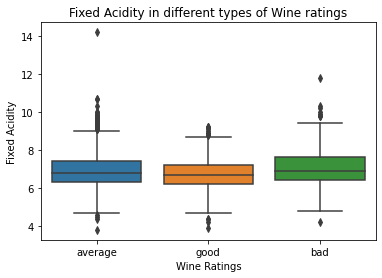

In [18]:
bx = sns.boxplot(x="rating", y='fixed_acidity', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

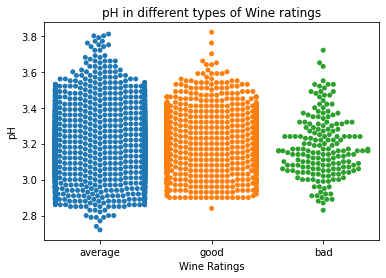

In [19]:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

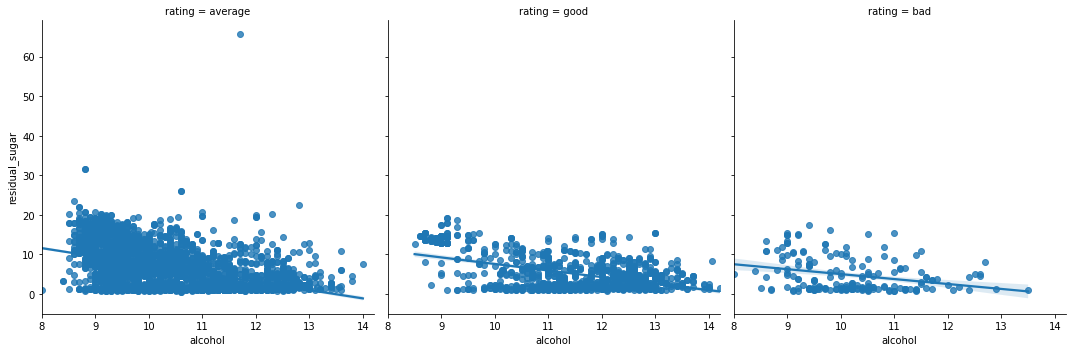

In [20]:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

In [21]:
import statsmodels.api as sm

In [22]:
y,X = dmatrices('quality ~ alcohol', data=wine, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          5.61e-226
Time:                        22:12:41   Log-Likelihood:                -5839.4
No. Observations:                4898   AIC:                         1.168e+04
Df Residuals:                    4896   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5820      0.098     26.345      0.000       2.390       2.774
alcohol        0.3135      0.009     33.858      0.000       0.295       0.332
==============================================================================
Omnibus:                       88.780   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.233
Skew:                           0.031   Prob(JB):                     7.29e-40
Kurtosis:                       3.938   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model = smf.OLS.from_formula('quality ~ alcohol', data = wine)
results = model.fit()
print(results.params)

Intercept    2.582009
alcohol      0.313469
dtype: float64


In [24]:
wine['rate_code'] = (wine['quality'] > 4).astype(np.float32)

<AxesSubplot:>

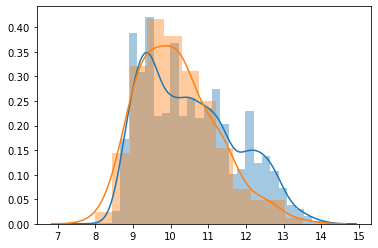

In [25]:
y, X = dmatrices('rate_code ~ alcohol', data = wine)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])


In [26]:
model = smf.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.157900
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.010     
Dependent Variable: rate_code        AIC:              1550.7857 
Date:               2020-10-02 22:13 BIC:              1563.7789 
No. Observations:   4898             Log-Likelihood:   -773.39   
Df Model:           1                LL-Null:          -781.08   
Df Residuals:       4896             LLR p-value:      8.8502e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.6194     0.6876   0.9008   0.3677   -0.7283   1.9672
alcohol      0.2542     0.0671   3.7878   0.0002    0.1227   0.3857
=================================================================

"""

In [27]:
yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.04      0.34      0.08       183
         1.0       0.96      0.71      0.82      4715

    accuracy                           0.69      4898
   macro avg       0.50      0.52      0.45      4898
weighted avg       0.93      0.69      0.79      4898



In [28]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + citric_acid + fixed_acidity', data = wine)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       183
         1.0       0.96      1.00      0.98      4715

    accuracy                           0.96      4898
   macro avg       0.48      0.50      0.49      4898
weighted avg       0.93      0.96      0.94      4898



In [29]:
y, X = dmatrices('rate_code ~ alcohol', data = wine)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       183
         1.0       0.96      1.00      0.98      4715

    accuracy                           0.96      4898
   macro avg       0.48      0.50      0.49      4898
weighted avg       0.93      0.96      0.94      4898

